In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.indexes.base import Index

In [47]:
df = pd.read_csv('dataR2.csv')
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
print('X.shape:', X.shape)
print('y.shape:', y.shape)
feature_names = df.columns[:-1]
target_names = ['Healthy controls', 'Patients']

X.shape: (116, 9)
y.shape: (116,)


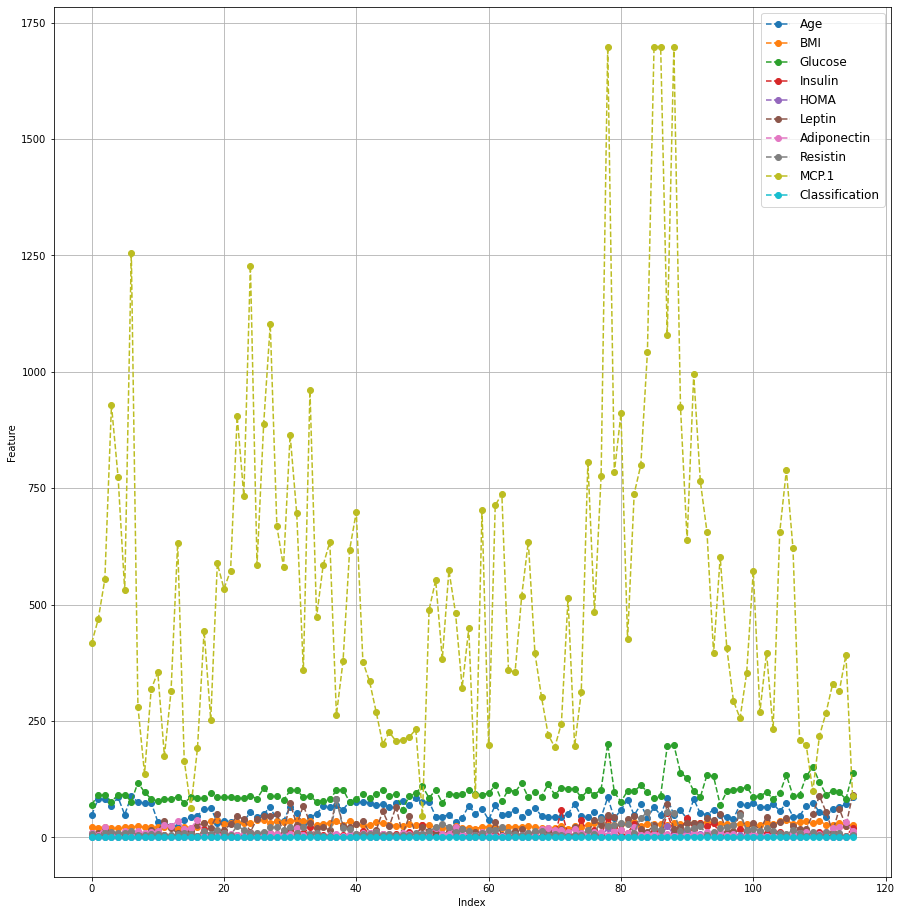

In [31]:
width_height_2 = (15, 16)
plt.figure(figsize=width_height_2)
for column in df:
    plt.plot(df.index.values, df[column], 'o--', label=column)
plt.xlabel("Index")
plt.ylabel("Feature")
plt.grid(True)
plt.legend(loc='upper right',prop={'size':12})
plt.show()

In [59]:
def draw_features_plot(feature1, feature2):
    for c in range(1, 3):
        plt.plot(X[y == c, feature1], X[y == c, feature2], 'rbg'[c-1] + 'o', label= target_names[c-1])
    plt.xlabel(feature_names[feature1])
    plt.ylabel(feature_names[feature2])
    plt.grid()
    plt.legend()

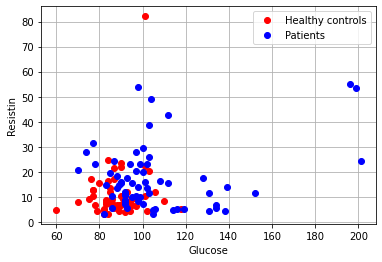

In [79]:
feature1 = 2
feature2 = 7
draw_features_plot(feature1, feature2)

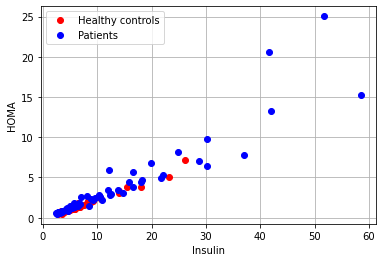

In [80]:
draw_features_plot(3, 4)

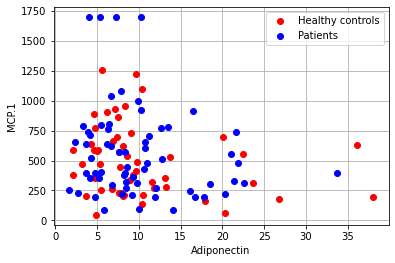

In [95]:
draw_features_plot(6, 8)

In [41]:
# logistic regression
from sklearn.linear_model import LogisticRegression
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

/home/zahra/anaconda3/envs/my_env1/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7844827586206896